<a href="https://colab.research.google.com/github/hargurjeet/hpe/blob/main/Problem_2_hpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
## Importing all the requeired libraries

# For data preprocessing
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTENC

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import pylab

# Librareis for building pipelines
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# To build ML models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/hpe/main/Problem2.csv')
df.head()

Y   V1   V2        V3   V4        V5        V6    V7        V8  \
0    9,111   0.0  0.0  0.343088  0.0  100.4014  100.6104  0.04  0.551271   
1   10,918   0.0  0.0  0.343088  0.0  100.5697  100.7629  0.04  0.551271   
2   13,402   0.0  0.0  0.343088  0.0  100.7521  100.8958  0.04  0.551271   
3   11,530   0.0  0.0  0.357665  0.0  100.9278  101.0110  0.04  0.556536   
4    9,972   0.0  0.0  0.357665  0.0  101.0532  101.1080  0.04  0.556536   

         V9  
0  3.361059  
1  3.361059  
2  3.361059  
3  3.559978  
4  3.559978

In [4]:
## Seprating the traing and the test set
df_training = df.iloc[:144, :]
df_test = df.iloc[144:147, :]

In [5]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       144 non-null    object 
 1   V1      144 non-null    float64
 2   V2      144 non-null    float64
 3   V3      144 non-null    float64
 4   V4      144 non-null    float64
 5   V5      144 non-null    float64
 6   V6      144 non-null    float64
 7   V7      144 non-null    float64
 8   V8      144 non-null    float64
 9   V9      144 non-null    float64
dtypes: float64(9), object(1)
memory usage: 11.4+ KB


In [6]:
# as target variable is number, Coverting Y to numberic
df_training['Y'] = df_training['Y'].str.replace(',', '').astype(float)
df_training['Y'].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       9111.0
1      10918.0
2      13402.0
3      11530.0
4       9972.0
        ...   
139     6194.0
140     9575.0
141    10565.0
142     9097.0
143     9866.0
Name: Y, Length: 144, dtype: float64

In [7]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       144 non-null    float64
 1   V1      144 non-null    float64
 2   V2      144 non-null    float64
 3   V3      144 non-null    float64
 4   V4      144 non-null    float64
 5   V5      144 non-null    float64
 6   V6      144 non-null    float64
 7   V7      144 non-null    float64
 8   V8      144 non-null    float64
 9   V9      144 non-null    float64
dtypes: float64(10)
memory usage: 11.4 KB


In [8]:
df_training.describe().T

count         mean          std         min          25%           50%  \
Y   144.0  9872.597222  2995.146872  128.000000  8347.500000  10076.500000   
V1  144.0    38.516667    26.252747    0.000000     0.000000     53.500000   
V2  144.0     0.091540     0.087627    0.000000     0.015592      0.043288   
V3  144.0     0.270869     0.069505    0.120897     0.216147      0.299312   
V4  144.0     0.076968     0.070805    0.000000     0.014333      0.057803   
V5  144.0   100.128055     1.201104   96.322000    99.737398    100.324900   
V6  144.0   100.158992     1.292624   96.105030    99.764295    100.280550   
V7  144.0     0.029583     0.028820   -0.060000     0.017500      0.040000   
V8  144.0     0.611368     0.037454    0.551271     0.588272      0.599102   
V9  144.0     1.235073     2.121108   -5.418855     0.412458      1.930578   

             75%           max  
Y   11674.000000  17892.000000  
V1     56.850000     66.900000  
V2      0.176864      0.264827  
V3      0.327257      0.358630  
V4      0.134171      0.235520  
V5    100.992850    101.778600  
V6    100.957400    102.174800  
V7      0.050000      0.090000  
V8      0.640697      0.698619  
V9      2.486848      3.559978

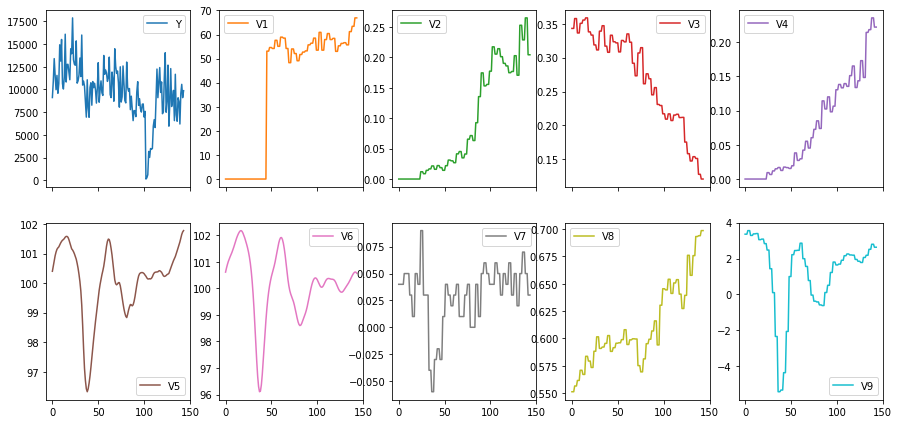

In [9]:
df_training.plot(subplots=True, layout=(4,5), figsize=(15,15));

In [10]:
corr = df_training.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


## Key insights

- Feature v3 and v4 seems to inversly porptional to each other
- Feature v5, v6 and v9 are closely co realted

Building ML model

In [15]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']

In [16]:
X = df_training[features]
y = df_training.Y
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
sample_incomplete_rows = df_training[df_training.isnull().any(axis=1)].head()
sample_incomplete_rows

Empty DataFrame
Columns: [Y, V1, V2, V3, V4, V5, V6, V7, V8, V9]
Index: []

In [ ]:
## Building ML pipeline
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values = np.nan, strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data, as the dataset doesnt have categorical columns there is no need to build categrocial transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, features)
    ])

data_prepared = preprocessor.fit_transform(X_train)
data_prepared

## Select and training a model

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, y_train)

LinearRegression()

In [31]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [5758.91818373 9818.26859807 8555.852473   8142.56666657 7174.158139  ]
Labels: [6673.0, 10738.0, 9673.0, 5957.0, 7886.0]


In [32]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2123.4320792944495

In [33]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, predictions)
lin_mae

1674.1945519477983

## Decison Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Decision tree seems to be over fitting

## Random forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, y_train)

predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

801.8867594368829

In [38]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
forest_scores = cross_val_score(forest_reg, data_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2223.06588033 2230.40617961 2238.76510602]
Mean: 2230.745721985726
Standard deviation: 6.413677498054647


## GridSerach CV¶


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2543.18701926522 {'max_features': 2, 'n_estimators': 3}
2290.505102226292 {'max_features': 2, 'n_estimators': 10}
2171.4331782068516 {'max_features': 2, 'n_estimators': 30}
2472.5780894867426 {'max_features': 4, 'n_estimators': 3}
2340.525663838485 {'max_features': 4, 'n_estimators': 10}
2211.529692828832 {'max_features': 4, 'n_estimators': 30}
2460.051340311762 {'max_features': 6, 'n_estimators': 3}
2338.19714427822 {'max_features': 6, 'n_estimators': 10}
2220.0185122232106 {'max_features': 6, 'n_estimators': 30}
2359.84722079278 {'max_features': 8, 'n_estimators': 3}
2292.2488957259225 {'max_features': 8, 'n_estimators': 10}
2164.338849629575 {'max_features': 8, 'n_estimators': 30}
2425.6663070564823 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2360.64615188263 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2518.6121809038045 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2366.67356606061 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [43]:
df_test

Y    V1        V2        V3        V4        V5        V6    V7  \
144   ?   67.0  0.212043  0.123172  0.216391  101.7656  100.4836  0.04   
145   ?   67.0  0.212043  0.123172  0.216391  101.6869  100.3605  0.04   
146   ?   67.0  0.212043  0.123172  0.216391  101.5832  100.2126  0.04   

           V8        V9  
144  0.688172  2.394371  
145  0.688172  2.394371  
146  0.688172  2.394371

In [44]:
X_test = df_test.drop("Y", axis=1)
y_test = df_test["Y"].copy()

In [45]:
final_model = grid_search.best_estimator_
X_test_prepared = preprocessor.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions


array([7973.2       , 7707.83333333, 7541.16666667])

In [22]:
# spot check some algorithms
regressor = []
regressor.append(('LDA', LinearDiscriminantAnalysis()))
regressor.append(('KNN', KNeighborsRegressor()))
regressor.append(('NB', GaussianNB()))
regressor.append(('SVM', SVC()))
regressor.append(('CTREE', DecisionTreeRegressor()))
regressor.append(('RFT', RandomForestRegressor()))

In [23]:
# Bundle preprocessing and modeling code in a pipeline
for model, clf in regressor:
  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)
                                ,('model', clf)
                              ])
  # # Preprocessing of training data, fit model 
  my_pipeline.fit(X_train, y_train)

  # Preprocessing of validation data, get predictions
  preds = my_pipeline.predict(X_test)

  # Evaluate the model
  score = accuracy_score(y_test, preds)
  
  print('Accuracy:' + model, score)

ValueError: ignored